In [2]:
from pathlib import Path

import pandas as pd


data_path = Path("data/")

In [6]:
eval_results_df = (
    pd.concat(
        [
            pd.read_csv(data_path / "evaluation_results_500_llama3b.csv"),
            pd.read_csv(data_path / "evaluation_results_500_mistral_7b.csv"),
            pd.read_csv(data_path / "evaluation_results_500.csv"),
            pd.read_csv(data_path / "evaluation_results_gpt.csv"),
            pd.read_csv(data_path / "evaluation_results_raif_models.csv"),
        ]
    )
    .sort_values("execution_accuracy", ascending=False)
    .reset_index(drop=True)
)
eval_results_df

,model,execution_accuracy,avg_latency_sec
0,gemma3:12b,0.704,5.653825
1,large-coder,0.684,2.771946
2,gpt-4o,0.680,3.253188
3,gpt-4.1,0.662,3.028798
4,qwen2.5-coder:7b,0.652,3.361410
5,large,0.650,3.003515
6,gpt-4o-mini,0.638,3.304905
7,qwen2.5:7b,0.578,3.208450
8,llama3.2:3b,0.450,2.019169
9,mistral:7b,0.432,4.393271


Matplotlib is building the font cache; this may take a moment.
/var/folders/gn/2rl2yrpd6kd1xyntb037l6s1ymb2cb/T/ipykernel_34975/1201155133.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(eval_results_df["model"], rotation=45, ha="right")


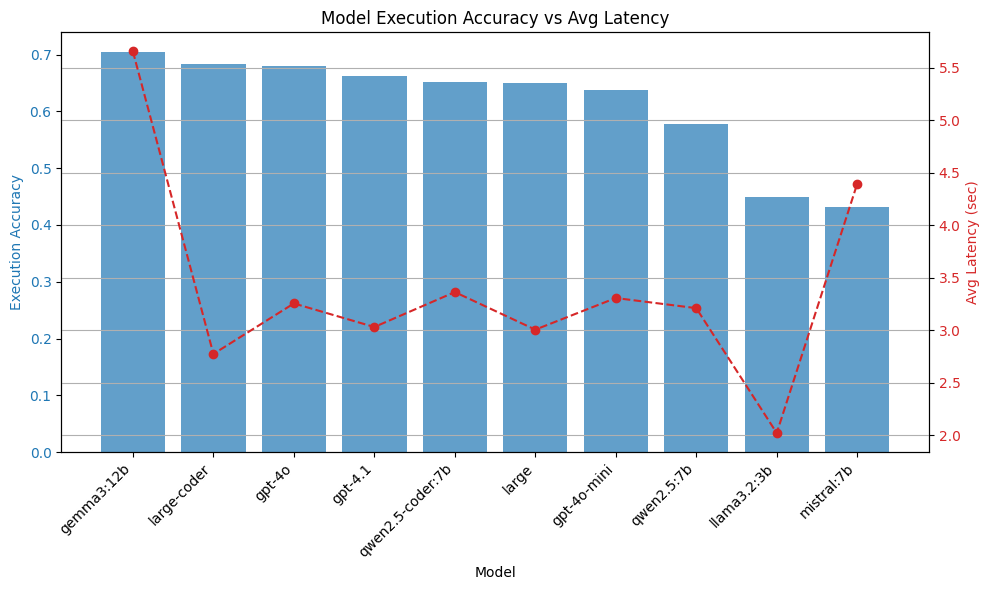

In [8]:
import matplotlib.pyplot as plt


fig, ax1 = plt.subplots(figsize=(10, 6))

color = "tab:blue"
ax1.set_xlabel("Model")
ax1.set_ylabel("Execution Accuracy", color=color)
ax1.bar(eval_results_df["model"], eval_results_df["execution_accuracy"], color=color, alpha=0.7, label="Accuracy")
ax1.tick_params(axis="y", labelcolor=color)
ax1.set_xticklabels(eval_results_df["model"], rotation=45, ha="right")

ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Avg Latency (sec)", color=color)
ax2.plot(
    eval_results_df["model"],
    eval_results_df["avg_latency_sec"],
    color=color,
    marker="o",
    linestyle="--",
    label="Latency",
)
ax2.tick_params(axis="y", labelcolor=color)

plt.title("Model Execution Accuracy vs Avg Latency")
fig.tight_layout()
plt.grid(True)
plt.show()